In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Title of Project**
# Dog vs Cat Image Classifier

# **Objective**
# To build a machine learning model capable of classifying images of dogs and cats.

# **Data Source**
# Kaggle Dataset: Dogs vs Cats (https://www.kaggle.com/c/dogs-vs-cats/data)

#**Import Library**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# **Import Data**

In [13]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/Animal Detection Datasets/data/train"
# Assuming dataset has two folders: `dogs` and `cats`.

# **Describe Data**
# Dataset consists of labeled images categorized into two classes: 'dogs' and 'cats'.
# Each image has unique characteristics. We'll analyze some samples below.

# **Data Visualization**


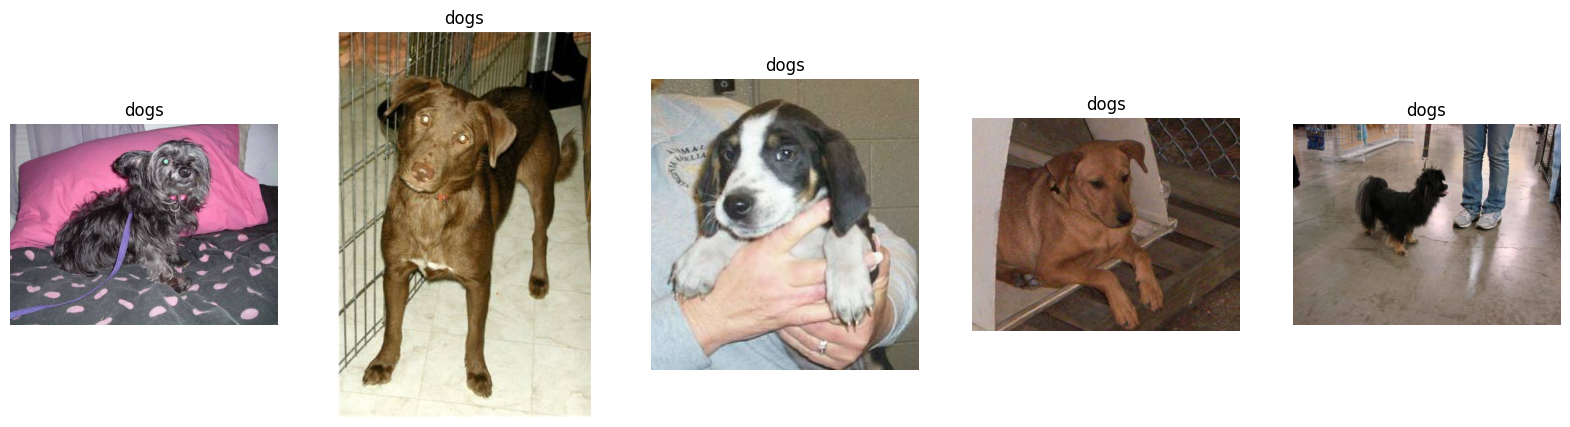

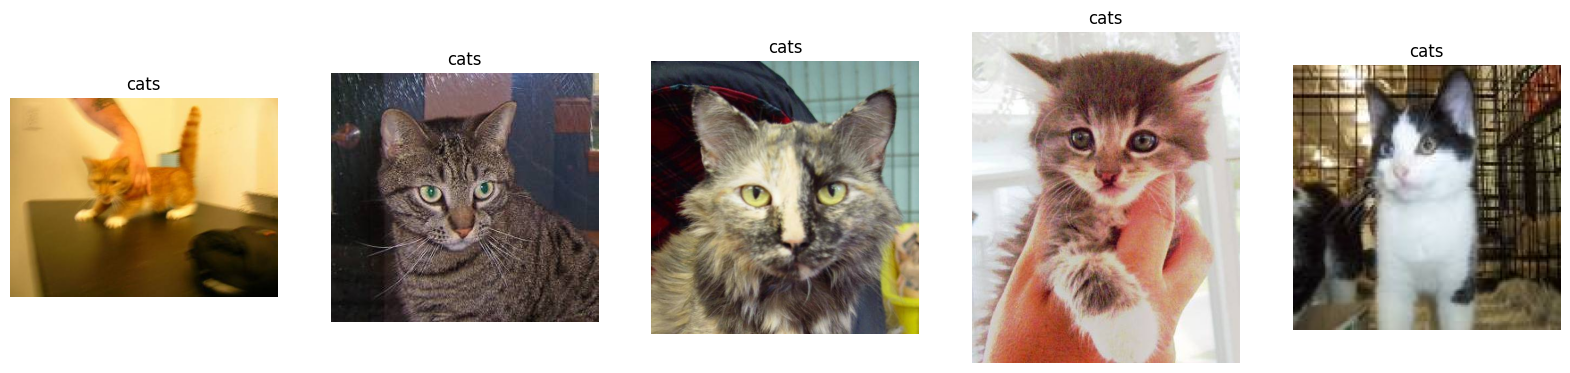

In [14]:
import os
from matplotlib.image import imread

categories = ["dogs", "cats"]
img_size = (150, 150)

for category in categories:
    path = os.path.join(data_dir, category)
    images = os.listdir(path)[:5]
    fig, ax = plt.subplots(1, 5, figsize=(20, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(path, img_name)
        img = imread(img_path)
        ax[i].imshow(img)
        ax[i].axis('off')
        ax[i].set_title(category)
    plt.show()

# **Data Preprocessing**


In [15]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(data_dir,
                                                    target_size=img_size,
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(data_dir,
                                                         target_size=img_size,
                                                         batch_size=32,
                                                         class_mode='binary',
                                                         subset='validation')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


# **Define Target Variable (y) and Feature Variables (X)**
# Already handled by the ImageDataGenerator.

# **Train Test Split**
# Using the validation split parameter in ImageDataGenerator, no need for additional split.

# **Modeling**


In [16]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=img_size + (3,)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Model Evaluation**


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 230s 350ms/step - accuracy: 0.5758 - loss: 0.6870 - val_accuracy: 0.7150 - val_loss: 0.5559
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 264s 332ms/step - accuracy: 0.6929 - loss: 0.5763 - val_accuracy: 0.7038 - val_loss: 0.5487
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 19us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 211s 335ms/step - accuracy: 0.7426 - loss: 0.5232 - val_accuracy: 0.7804 - val_loss: 0.4672
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 260s 333ms/step - accuracy: 0.7869 - loss: 0.4638 - val_accuracy: 0.7966 - val_loss: 0.4341
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 261s 333ms/step - accuracy: 0.8072 - loss: 0.4261 - val_accuracy: 0.8126 - val_loss: 0.4038
Epoch 10/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


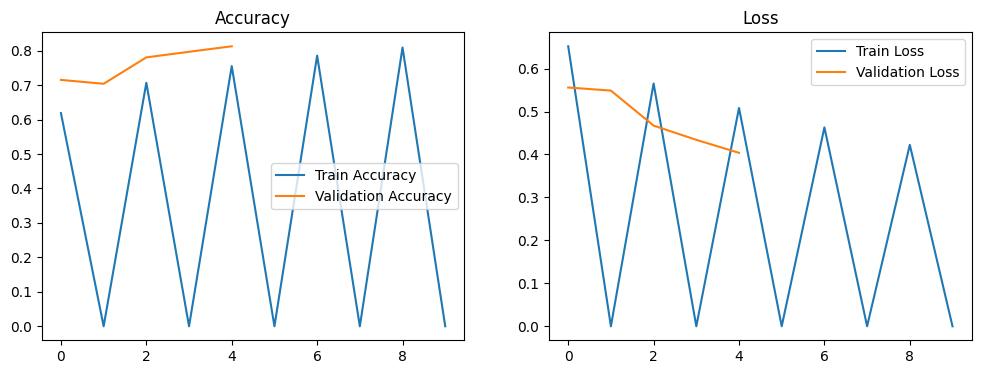

In [17]:
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator))

# accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

# **Prediction**


In [20]:
def predict_image(image_path):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(image_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    return 'dog' if prediction[0] > 0.5 else 'cat'

sample_image_path = "/content/drive/MyDrive/Colab Notebooks/Animal Detection Datasets/dogvscat/test/dogs/250.jpg"
print(f"Prediction: {predict_image(sample_image_path)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step
Prediction: dog


# **Explanation**
# The classifier uses a Convolutional Neural Network (CNN) to identify features in the images and predict whether the image belongs to a dog or cat. The model's accuracy can be improved further by hyperparameter tuning, increasing dataset size, or using a pre-trained model such as VGG16 or ResNet.